# Práctica: Análise de Datos Temporais con Pandas


Nesta práctica, traballaredes con datos do Instituto Nacional de Estatística (INE) sobre a evolución dos prezos do IPC de diferentes produtos. 

Sobre o dataset:

- Índice: expresa un valor en base 100 (sobre un ano de referencia).
- Variación anual: compara o mes actual co o mesmo mes do ano anterior.
- Variación en lo que va de año: compara o mes actual co mes de xaneiro do mesmo ano.
- Vairación mensual: compara o valor co mes anterior.

## Preparación

- Descarga dos datos: Accede á ligazón proporcionada e descarga os datos en calquer formato compatible con Pandas (XML, CSV, JSON) [https://datos.gob.es/es/catalogo/ea0010587-indices-nacionales-de-clases-ipc-identificador-api-509041](https://datos.gob.es/es/catalogo/ea0010587-indices-nacionales-de-clases-ipc-identificador-api-509041)

- Utiliza un entorno conda que teña instalado ``pandas`` e ``matplotlib``.

## Descrición

1. Utiliza ``pandas`` para cargar os datos nun DataFrame e preparalos para a análise.
    Ten en conta que será necesario preprocesar o dataset para o correcto funcionamiento do DataFrame. Douche unhas pistas: 
    - As datas están organizadas en sentido inverso, é decir aparecen primeiro as datas mais recentes. 
    - Por defecto o valor das datas é un string, deberás formatearlo correctamente para que o DataFrame o identifique en formato ``datetime``.
    - Os valores no campo "Total" separan os valores decimais por ",", para poder facer o casting a float debedes camialos por ".".

2. Determina os 5 produtos que máis incrementaron de prezo no ano 2024. (Usa o tipo de dato "Variación anual")

3. Representa a evolución do valor do tipo de dato "Índice" dos 5 produtos anteriores nunha gráfica. 

4. Determina o ano co máximo valor de incremento medio considerando todos os produtos. (Usa o tipo de dato "Variación anual")


## Entrega

Debedes entregar un script en Python onde se realicen todos os pasos descritos e engadir a gráfica obtenida en formato .png.



### ⬇️📦 Mágias para la instalación de los paquetes.

In [57]:
%conda install -y pandas # o  %pip install pandas
%conda install -y matplotlib # o %pip install matplotlib
%conda install -y numpy # o %pip install numpy

error: incomplete escape \U at position 28

## ⬇️📦 Imports Necesarios

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

## 1. Utiliza ``pandas`` para cargar os datos nun DataFrame e preparalos para a análise.
    Ten en conta que será necesario preprocesar o dataset para o correcto funcionamiento do DataFrame. Douche unhas pistas: 
    - As datas están organizadas en sentido inverso, é decir aparecen primeiro as datas mais recentes. 
    - Por defecto o valor das datas é un string, deberás formatearlo correctamente para que o DataFrame o identifique en formato ``datetime``.
    - Os valores no campo "Total" separan os valores decimais por ",", para poder facer o casting a float debedes camialos por ".".

### Leer el fichero csv y, con esto, obtener nuestro dataframe.

In [ ]:
df = pd.read_csv("ipc.csv",sep="\t")

df


,Clases,Tipo de dato,Periodo,Total
0,Índice general,Índice,2025M01,"116,733"
1,Índice general,Índice,2024M12,"116,534"
2,Índice general,Índice,2024M11,"116,01"
3,Índice general,Índice,2024M10,"115,726"
4,Índice general,Índice,2024M09,"115,009"
...,...,...,...,...
103039,1270 Otros servicios n.c.o.p.,Variación en lo que va de año,2002M05,"2,3"
103040,1270 Otros servicios n.c.o.p.,Variación en lo que va de año,2002M04,"2,2"
103041,1270 Otros servicios n.c.o.p.,Variación en lo que va de año,2002M03,"2,2"
103042,1270 Otros servicios n.c.o.p.,Variación en lo que va de año,2002M02,"1,9"


### ➿ Reemplezar las comas por puntos

In [ ]:
df['Total'] = df['Total'].replace(',','.', regex=True)



### 🔄 Llenar los valores vacíos con 0

In [ ]:
df.fillna(0.0, inplace=True) 

### 🔄 Parsear los valores de la columna 'Total' a float

In [ ]:
df["Total"] = pd.to_numeric(df['Total'],errors='coerce').astype(np.float32)

### 📆 Formatear las fechas de la columna 'Periodo'

In [ ]:
df['Periodo'] = df['Periodo'].apply(lambda x: datetime.strptime(x,'%YM%m'))


### ✅ Dataframe preparado para operar

In [ ]:
df

,Clases,Tipo de dato,Periodo,Total
0,Índice general,Índice,2025-01-01,116.733002
1,Índice general,Índice,2024-12-01,116.533997
2,Índice general,Índice,2024-11-01,116.010002
3,Índice general,Índice,2024-10-01,115.725998
4,Índice general,Índice,2024-09-01,115.009003
...,...,...,...,...
103039,1270 Otros servicios n.c.o.p.,Variación en lo que va de año,2002-05-01,2.300000
103040,1270 Otros servicios n.c.o.p.,Variación en lo que va de año,2002-04-01,2.200000
103041,1270 Otros servicios n.c.o.p.,Variación en lo que va de año,2002-03-01,2.200000
103042,1270 Otros servicios n.c.o.p.,Variación en lo que va de año,2002-02-01,1.900000


## 2. Determina os 5 produtos que máis incrementaron de prezo no ano 2024. (Usa o tipo de dato "Variación anual")


In [ ]:


df2 = df[df['Periodo'].dt.strftime('%Y')=='2024']
df2 = df2.loc[df2['Tipo de dato'] == 'Variación anual']

df2.groupby("Clases").max().sort_values(by='Total',ascending=False).head(5).reset_index()


#df2 = df.loc[(df['Periodo'].dt.strftime('%Y')=='2024') & (df['Tipo de dato'] == 'Variación anual')].groupby("Clases").max().reset_index().sort_values(by='Total',ascending=False).head(5)


,Clases,Tipo de dato,Periodo,Total
0,0115 Aceites y grasas,Variación anual,2024-12-01,49.099998
1,0734 Transporte de pasajeros por mar y por vía...,Variación anual,2024-12-01,41.900002
2,0451 Electricidad,Variación anual,2024-12-01,19.799999
3,0960 Paquetes turísticos,Variación anual,2024-12-01,14.600000
4,0116 Frutas,Variación anual,2024-12-01,13.600000


## 3. Representa a evolución do valor do tipo de dato "Índice" dos 5 produtos anteriores nunha gráfica. 

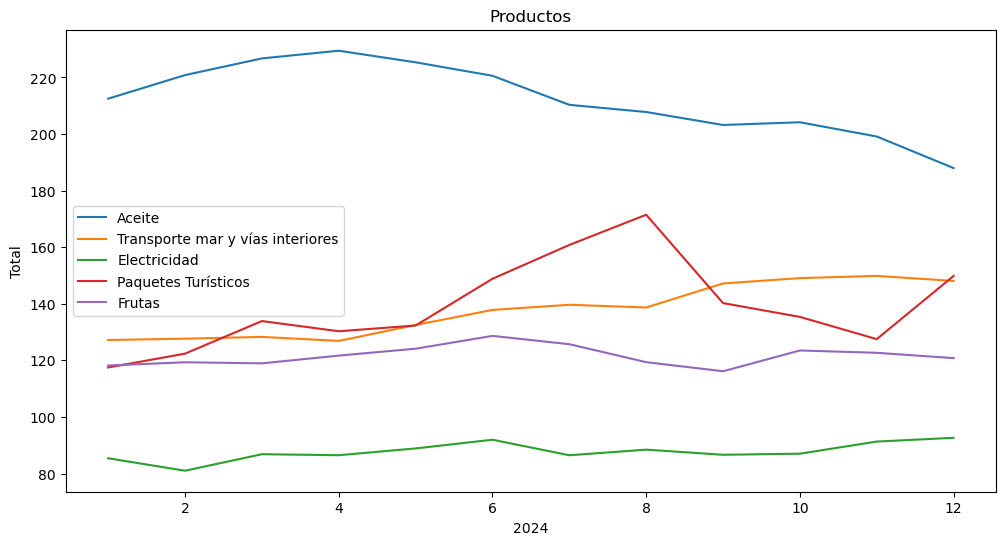

In [ ]:
#df3 = df.loc[(df['Periodo'].dt.strftime('%Y')=='2024') & (df['Tipo de dato'] == 'Índice')].groupby("Clases").max().reset_index().sort_values(by='Total',ascending=False).head(5)


df_aceite = df.loc[(df['Clases'] == '0115 Aceites y grasas' ) & (df['Tipo de dato'] == 'Índice') & (df['Periodo'].dt.strftime('%Y')=='2024')].sort_values(by='Periodo')
df_transporte = df.loc[(df['Clases'] == '0734 Transporte de pasajeros por mar y por vías navegables interiores' ) & (df['Tipo de dato'] == 'Índice')& (df['Periodo'].dt.strftime('%Y')=='2024')].sort_values(by='Periodo')
df_electricidad = df.loc[(df['Clases'] == '0451 Electricidad' ) & (df['Tipo de dato'] == 'Índice') & (df['Periodo'].dt.strftime('%Y')=='2024')].sort_values(by='Periodo')
df_paquetes_turiticos = df.loc[(df['Clases'] == '0960 Paquetes turísticos' ) & (df['Tipo de dato'] == 'Índice') & (df['Periodo'].dt.strftime('%Y')=='2024')].sort_values(by='Periodo')
df_frutas = df.loc[(df['Clases'] == '0116 Frutas' ) & (df['Tipo de dato'] == 'Índice') & (df['Periodo'].dt.strftime('%Y')=='2024')].sort_values(by='Periodo')



df




x = pd.to_datetime(df_aceite["Periodo"])

y_aceite = df_aceite['Total']
y_transporte = df_transporte['Total']
y_electricidad = df_electricidad['Total']
y_paquetes_turiticos = df_paquetes_turiticos['Total']
y_frutas = df_frutas['Total']


plt.figure(figsize=(12,6))
plt.xlabel('2024')
plt.ylabel('Total')
plt.title("Productos")
plt.plot(x.dt.month,y_aceite,label="Aceite")
plt.plot(x.dt.month,y_transporte,label="Transporte mar y vías interiores")
plt.plot(x.dt.month,y_electricidad,label="Electricidad")
plt.plot(x.dt.month,y_paquetes_turiticos,label="Paquetes Turísticos")
plt.plot(x.dt.month,y_frutas,label="Frutas")
plt.legend()

plt.show()



## 4. Determina o ano co máximo valor de incremento medio considerando todos os produtos. (Usa o tipo de dato "Variación anual")


In [71]:


df4 = df.loc[df['Tipo de dato'] == 'Variación anual']


df4[['Total','Periodo','Clases']].max()




Total               107.800003
Periodo    2025-01-01 00:00:00
Clases          Índice general
dtype: object